<a href="https://colab.research.google.com/github/iamVaibhav100/multilevel_dog_breed_classification/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Multi-level Dog breed Classification

Building an end-to-end multi-level dog breed classifier using TensorFlow.

### 1. Problem

Given an image of a dog, identify the breed.

### 2. Data

Data used is from Kaggle's dog breed identification competition.

Link : https://www.kaggle.com/c/dog-breed-identification/data

### 3. Evaluation

Evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

### 4. Features

Information about the data used:
* Data is a collection of images (unstructured data) hence deep learning approach is used.
* There are 120 different breeds of dogs available in the data used.
* There are around 10,000+ images for training set (labelled data).
* There are around 10,000+ images for testing set (no label).


In [ ]:
#!unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision"

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print("version:", hub.__version__)
print("version:", tf.__version__)

# checking for GPU avalability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

version: 0.12.0
version: 2.9.2
GPU available


## Getting data ready
Converting the images into Tensors (numerical representation)

In [3]:
# importing libraries
import pandas as pd
labels = pd.read_csv("drive/MyDrive/Dog_Vision/labels.csv")
print(labels.describe())
print(labels.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


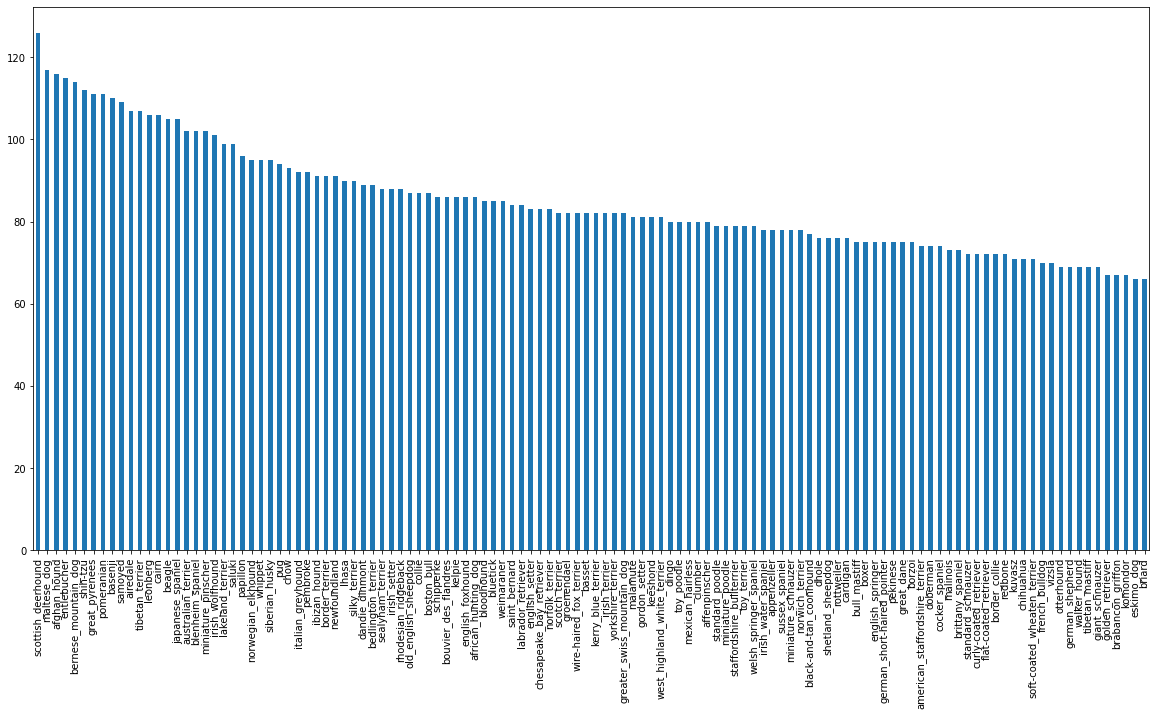

In [4]:
# How many images of each breed
labels["breed"].value_counts().plot.bar(figsize=(20, 10));

## Getting file paths for each image
creating a list of file paths for each path from labesls

In [5]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


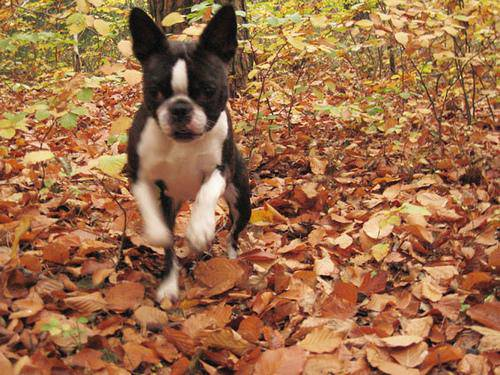

In [6]:
from IPython.display import Image
Image("drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [7]:
filepaths = ["drive/MyDrive/Dog_Vision/train/" + fname + ".jpg" for fname in labels["id"]]
filepaths[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
# Checking if number of filepaths matches the number of images in train folder
import os
if len(os.listdir("drive/MyDrive/Dog_Vision/train/")) == len(filepaths):
  print("Matches, proceed")
else:
  print("length does not match!")

Matches, proceed


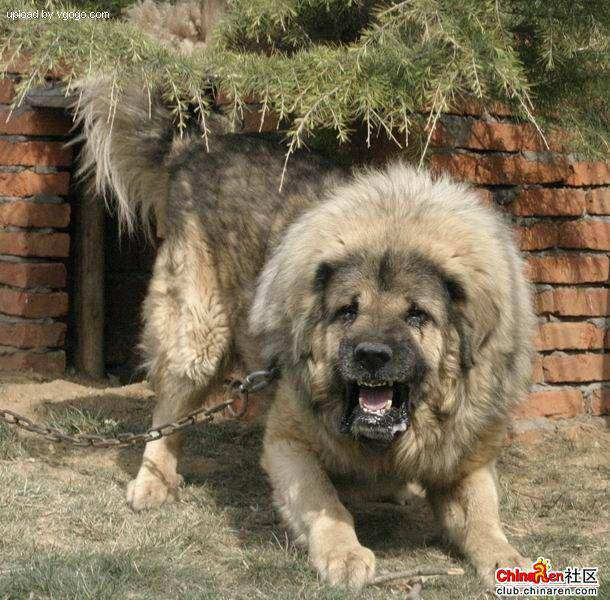

In [9]:
Image(filepaths[9000])

## Turning labels (breeds) into numbers
Taking breed column from labels csv file and turning it into numerical form

In [10]:
import numpy as np
breeds = labels["breed"].to_numpy()
len(breeds)

10222

In [11]:
unique_breeds = np.unique(breeds)
len(unique_breeds)

120

In [12]:
# Taking single breed and turning it into a boolean array
breeds[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
# Turning every breed label into boolean arrays
boolean_labels = [breed == unique_breeds for breed in breeds]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
len(boolean_labels)

10222

In [15]:
# Turning the boolean arrays into 1 and 0
print(breeds[0]) # original breed name
print(np.where(unique_breeds == breeds[0])) # index where the original breed name occurs
print(boolean_labels[0].argmax()) # index where breed name occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where the breed name occurs in boolean array

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating a validation set
splitting the data into test and train and experimenting with the results

In [16]:
# Setup X & Y variables
X = filepaths
Y = boolean_labels

# Experimenting with ~1000 images first
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [17]:
# Splitting the data into train and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X[:NUM_IMAGES],
                                                   Y[:NUM_IMAGES],
                                                   test_size=0.2,
                                                   random_state=42)
len(X_train), len(X_val), len(Y_train), len(Y_val)

(800, 200, 800, 200)

In [18]:
X_train[:5], Y_train[:2]

(['drive/MyDrive/Dog_Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog_Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog_Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog_Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog_Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

### Preprocessing images (Turning images into tensors)

Writing a function that:
* takes filepath as input
* Use tensorflow to read image and save it to a variable named image
* Turn image into tendor
* Resize image to be a shape of (224, 224)
* Return the modified image

In [19]:
# Convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filepaths[42])
image.shape

(257, 350, 3)

In [21]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [20]:
# Turning image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [23]:
# define image size
IMG_SIZE = 224

# define function to preprocess the images
def process_image(image_path, image_size=IMG_SIZE):
  """
  Takes image filepath and converts it into a tensor
  """

  # Read image
  image = tf.io.read_filename(image_path)
  # turn jpeg image into a tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize image
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Creating batches for data

Batch is a subset of the full dataset, containing a small number of examples from the full dataset.

* Training on mini-batches can be faster than training on the full dataset, especially when the dataset is large and the model is complex.
* Training on mini-batches can be more memory-efficient than training on the full dataset, especially when the dataset is very large.

In this case to use tensorflow effectively, data is represented in form of a tuple: `(image, label)`

In [24]:
# Function that returns the desired tuple (image, label)
def get_tuple(image_path, label):
  """
  takes image path with its associated label, returns processed image and label
  """
  image = process_image(image_path)
  return image, label